<a href="https://colab.research.google.com/github/SilvioCSOliveira/SpotifyChartsBR/blob/main/EstudoSpotifyV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas usadas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_style("whitegrid") # configurando um modo de apresentação dos graficos "mais legivel"

#Importando dados para o colab
SpotifyLista200 = pd.read_csv('df_top.csv') # Lista Top200
SpotifyFeatures = pd.read_csv('features.csv') # Caracteristicas das músicas
'''
#Importando dados para o colab, massa reduzida 
SpotifyLista200 = pd.read_csv('https://raw.githubusercontent.com/SilvioCSOliveira/SpotifyChartsBR/main/df_top_amostra.csv') # Lista Top200
SpotifyFeatures = pd.read_csv('https://raw.githubusercontent.com/SilvioCSOliveira/SpotifyChartsBR/main/features.csv') # Caracteristicas das músicas
'''
SpotifyFeatures.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.931,0.604,0,-1.41,0,0.0573,0.456,0.0,0.0488,0.864,129.926,audio_features,0EPxmvsG1BY5td4aTOkWBF,spotify:track:0EPxmvsG1BY5td4aTOkWBF,https://api.spotify.com/v1/tracks/0EPxmvsG1BY5...,https://api.spotify.com/v1/audio-analysis/0EPx...,144039,4


In [ ]:
# Montar dataset com Nome da musica, artista e quantidade de aparições (dias) no Top200
conta_aparicoes = SpotifyLista200.groupby(['track_id','Track Name','Artist'], as_index=False).count()
# Excluindo colunas que não serão usadas e perderam suas caracteristicas devido ao groupby
conta_aparicoes.drop('Position', inplace=True, axis=1)
conta_aparicoes.drop('Streams', inplace=True, axis=1)
conta_aparicoes.drop('URL', inplace=True, axis=1)
conta_aparicoes.drop('data_chart', inplace=True, axis=1)
conta_aparicoes.drop('data_chart_int', inplace=True, axis=1)
									
#Nomeando a coluna com a quantidade de aparições na lista
conta_aparicoes.columns = ('track_id','Track Name','Artist','quantidade_dias_lista')

conta_aparicoes.head(5)

,track_id,Track Name,Artist,quantidade_dias_lista
0,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),ZAYN,73
1,000xYdQfIZ4pDmBGzQalKU,"Eu, Você, O Mar e Ela",Luan Santana,142
2,006pMMCuRo2TFjh8sNGSov,"Dias De Luta, Dias De Gloria",Charlie Brown Jr.,7
3,007QSAaELpVxtX5Z6dMn0U,Laranjinha - Ao Vivo,Wesley Safadão,17
4,00FOgV1ZRgn6oBk6mIoGLm,Trem Bala,Vida Música Espírito,3


In [ ]:
conta_aparicoes.describe()

,quantidade_dias_lista
count,3476.000000
mean,78.987054
std,123.599423
min,1.000000
25%,3.000000
50%,16.000000
75%,108.250000
max,1155.000000


In [ ]:
print("- Média:",  conta_aparicoes['quantidade_dias_lista'].mean()
," \n- Moda:", conta_aparicoes['quantidade_dias_lista'].mode().values
,"\n- Mediana:", conta_aparicoes['quantidade_dias_lista'].median())

- Média: 78.98705408515535  
- Moda: [1] 
- Mediana: 16.0


In [ ]:
print('- Quantidade de musicas com uma aparição:', conta_aparicoes.query('quantidade_dias_lista == 1')['quantidade_dias_lista'].count()
, '\n- Quantidade de musicas com menos de 16 aparições:', conta_aparicoes.query('quantidade_dias_lista < 16')['quantidade_dias_lista'].count()
, '\n- Quantidade de musicas com 16 aparições:', conta_aparicoes.query('quantidade_dias_lista == 16')['quantidade_dias_lista'].count()
, '\n- Quantidade de musicas com mais de 16 aparições:', conta_aparicoes.query('quantidade_dias_lista > 16')['quantidade_dias_lista'].count()
, '\n- Quantidade de total de musicas no dataset:', conta_aparicoes['quantidade_dias_lista'].count())

- Quantidade de musicas com uma aparição: 632 
- Quantidade de musicas com menos de 16 aparições: 1718 
- Quantidade de musicas com 16 aparições: 22 
- Quantidade de musicas com mais de 16 aparições: 1736 
- Quantidade de total de musicas no dataset: 3476


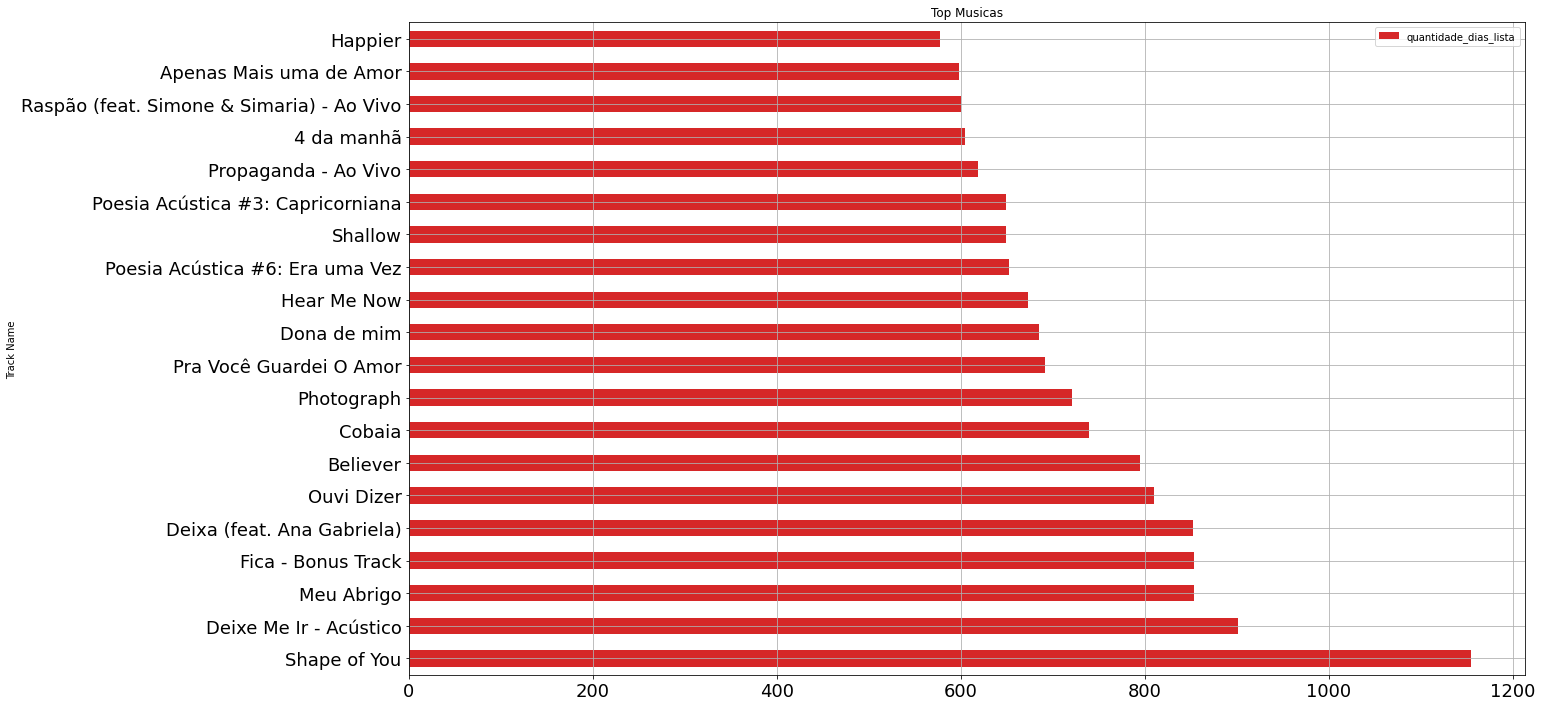

In [ ]:
#Listando o resultado em forma de gráfico as 20 musicas com mais aparições
conta_aparicoes.sort_values('quantidade_dias_lista',  ascending=False).head(20).plot(
    kind='barh',y='quantidade_dias_lista',x='Track Name',figsize=(20,12),title = 'Top Musicas',fontsize=18 , grid=True,color= '#d62728')

In [ ]:
# Montar dataset com Nome do artista e quantidade de aparições (dias) no Top200
conta_aparicoes_artista = SpotifyLista200.groupby(['Artist'], as_index=False).count()
# Excluindo colunas que não serão usadas e perderam suas caracteristicas devido ao groupby
conta_aparicoes_artista.drop('Position', inplace=True, axis=1)
conta_aparicoes_artista.drop('Streams', inplace=True, axis=1)
conta_aparicoes_artista.drop('URL', inplace=True, axis=1)
conta_aparicoes_artista.drop('data_chart', inplace=True, axis=1)
conta_aparicoes_artista.drop('data_chart_int', inplace=True, axis=1)
conta_aparicoes_artista.drop('track_id', inplace=True, axis=1)
conta_aparicoes_artista.drop('Track Name', inplace=True, axis=1)
									
#Nomeando a coluna com a quantidade de aparições na lista
conta_aparicoes_artista.columns = ('Artist','quantidade_dias_lista')

#Listando o resultado em forma de grafico, as 20 musica com mais aparições
conta_aparicoes_artista.sort_values('quantidade_dias_lista',  ascending=False).head(12)


,Artist,quantidade_dias_lista
418,Marília Mendonça,12302
672,Zé Neto & Cristiano,7971
219,Henrique & Juliano,7166
261,Jorge & Mateus,6734
420,Matheus & Kauan,6625
212,Gusttavo Lima,5341
22,Alok,4996
660,Wesley Safadão,4600
10,ANAVITÓRIA,4265
26,Anitta,4030


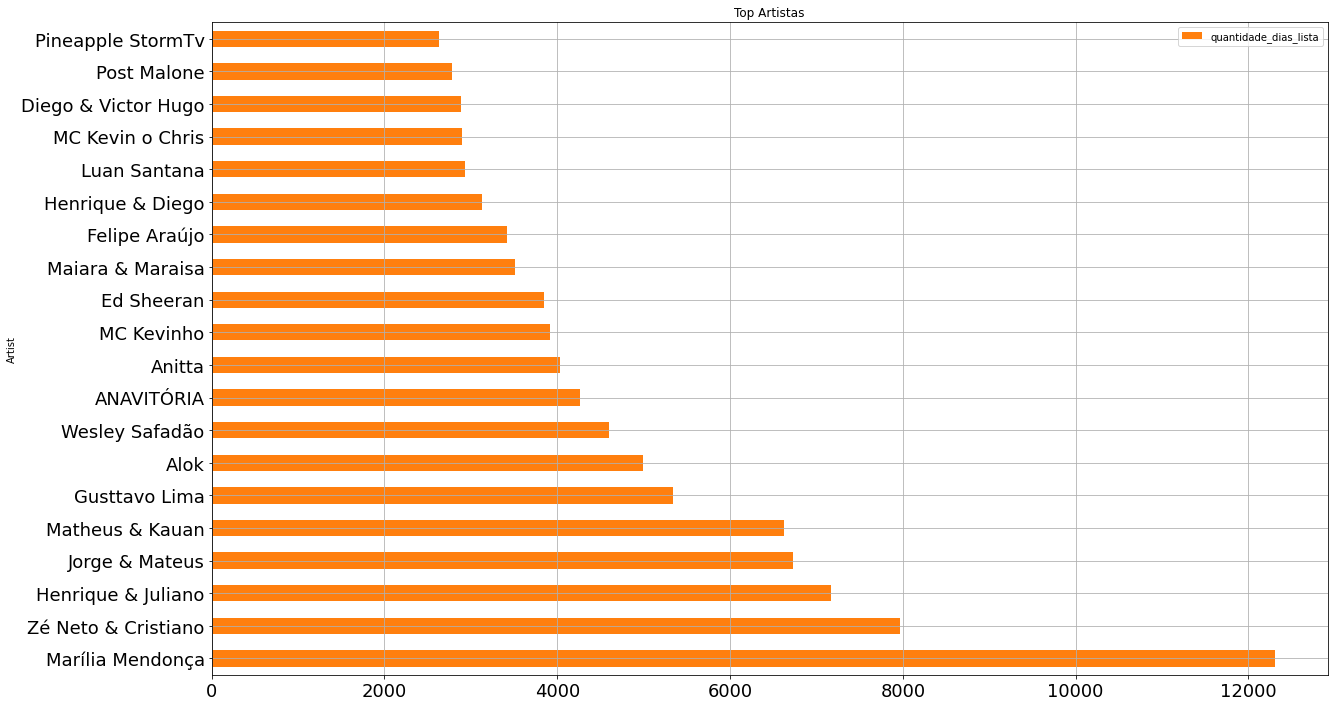

In [ ]:
#Listando o resultado em forma de gráfico os 20 artistas com mais aparições
conta_aparicoes_artista.sort_values('quantidade_dias_lista',  ascending=False).head(20).plot(
    kind='barh',y='quantidade_dias_lista',x='Artist',figsize=(20,12),title = 'Top Artistas',fontsize=18 , grid=True,color='#ff7f0e')

In [ ]:
# Analisar as músicas dos "mais" Marília Mendonça e Ed Sheeran
aparicoes_artistas_mais = SpotifyLista200.query('Artist == "Marília Mendonça" or Artist== "Ed Sheeran" ')

conta_aparicoes_artistas_mais = aparicoes_artistas_mais.groupby(['track_id','Track Name','Artist'], as_index=False).count()
# Excluindo colunas que não serão usadas e perderam suas caracteristicas devido ao groupby
conta_aparicoes_artistas_mais.drop('Position', inplace=True, axis=1)
conta_aparicoes_artistas_mais.drop('Streams', inplace=True, axis=1)
conta_aparicoes_artistas_mais.drop('URL', inplace=True, axis=1)
conta_aparicoes_artistas_mais.drop('data_chart', inplace=True, axis=1)
conta_aparicoes_artistas_mais.drop('data_chart_int', inplace=True, axis=1)
									
#Nomeando a coluna com a quantidade de aparições na lista
conta_aparicoes_artistas_mais.columns = ('track_id','Track Name','Artist','quantidade_dias_lista')

conta_aparicoes_artistas_mais.sort_values('quantidade_dias_lista',  ascending=False)



,track_id,Track Name,Artist,quantidade_dias_lista
101,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,1155
90,6fxVffaTuwjgEk5h9QyRjy,Photograph,Ed Sheeran,721
48,3RbXsVQr4jeTxvT35Hssq3,Bebi Liguei - Ao Vivo,Marília Mendonça,556
61,4YhPcVIxIAJrLhFVPGbJkE,De Quem É a Culpa? - Ao Vivo,Marília Mendonça,507
77,5fY9bVl1Wj4PIM3wnduWop,Serenata - Ao Vivo,Marília Mendonça,489
...,...,...,...,...
22,1TSOFMNNDVaOLA3QHnA7kO,A Solidão É uma Ressaca,Marília Mendonça,1
9,0VsGaRXR5WAzpu51unJTis,Best Part of Me (feat. YEBBA),Ed Sheeran,1
64,4mJDfMcT7odIUjWlb2WO4L,Baby One More Time - Recorded at Spotify Studi...,Ed Sheeran,1
2,0AtP8EkGPn6SwxKDaUuXec,Remember The Name (feat. Eminem & 50 Cent),Ed Sheeran,1


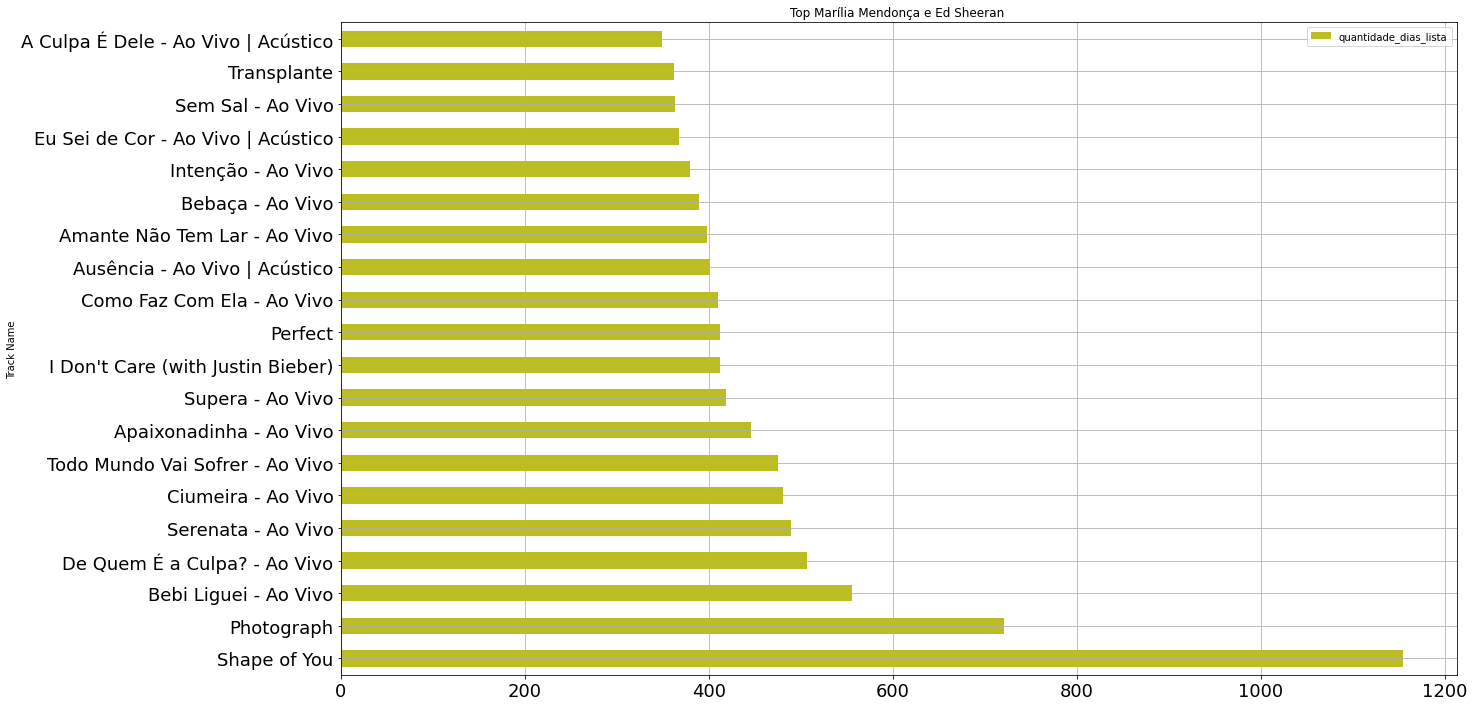

In [ ]:
#Listando o Top 20 das musicas dos dois maiores Marília Mendonça e Ed Sheeran
conta_aparicoes_artistas_mais.sort_values('quantidade_dias_lista',  ascending=False).head(20).plot(
    kind='barh',y='quantidade_dias_lista',x='Track Name',figsize=(20,12),title = 'Top Marília Mendonça e Ed Sheeran ',fontsize=18 , grid=True,color='#bcbd22')

In [ ]:
# Avaliar musicas Top 100 de aparições
MusicasTop100 = conta_aparicoes.sort_values('quantidade_dias_lista',  ascending=False).head(100)
MusicasTop100Completo = pd.merge(MusicasTop100,SpotifyFeatures, left_on='track_id', right_on='id')
MusicasTop100Completo.head()



,track_id,Track Name,Artist,quantidade_dias_lista,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,1155,0.825,0.652,1,-3.183,0,0.0802,0.581,0.0,0.0931,0.931,95.977,audio_features,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,https://api.spotify.com/v1/audio-analysis/7qiZ...,233713,4
1,2srL4DYBekshpbprS6H0mO,Deixe Me Ir - Acústico,1Kilo,901,0.555,0.439,7,-11.026,1,0.2220,0.841,0.0,0.1060,0.705,186.581,audio_features,2srL4DYBekshpbprS6H0mO,spotify:track:2srL4DYBekshpbprS6H0mO,https://api.spotify.com/v1/tracks/2srL4DYBeksh...,https://api.spotify.com/v1/audio-analysis/2srL...,213192,4
2,5U28PY9MekLyCBYtLHGQpe,Meu Abrigo,Melim,853,0.658,0.572,3,-7.527,1,0.0304,0.214,0.0,0.1250,0.741,92.011,audio_features,5U28PY9MekLyCBYtLHGQpe,spotify:track:5U28PY9MekLyCBYtLHGQpe,https://api.spotify.com/v1/tracks/5U28PY9MekLy...,https://api.spotify.com/v1/audio-analysis/5U28...,231474,4
3,1qDZnViQgUItsMpWLVwfGb,Fica - Bonus Track,ANAVITÓRIA,853,0.645,0.505,10,-6.432,1,0.0279,0.450,0.0,0.0938,0.499,94.025,audio_features,1qDZnViQgUItsMpWLVwfGb,spotify:track:1qDZnViQgUItsMpWLVwfGb,https://api.spotify.com/v1/tracks/1qDZnViQgUIt...,https://api.spotify.com/v1/audio-analysis/1qDZ...,184280,4
4,3fLqmaO4vvZpFZSZy52VMp,Deixa (feat. Ana Gabriela),Lagum,852,0.498,0.326,0,-8.223,1,0.0631,0.821,0.0,0.1930,0.323,81.457,audio_features,3fLqmaO4vvZpFZSZy52VMp,spotify:track:3fLqmaO4vvZpFZSZy52VMp,https://api.spotify.com/v1/tracks/3fLqmaO4vvZp...,https://api.spotify.com/v1/audio-analysis/3fLq...,176025,4


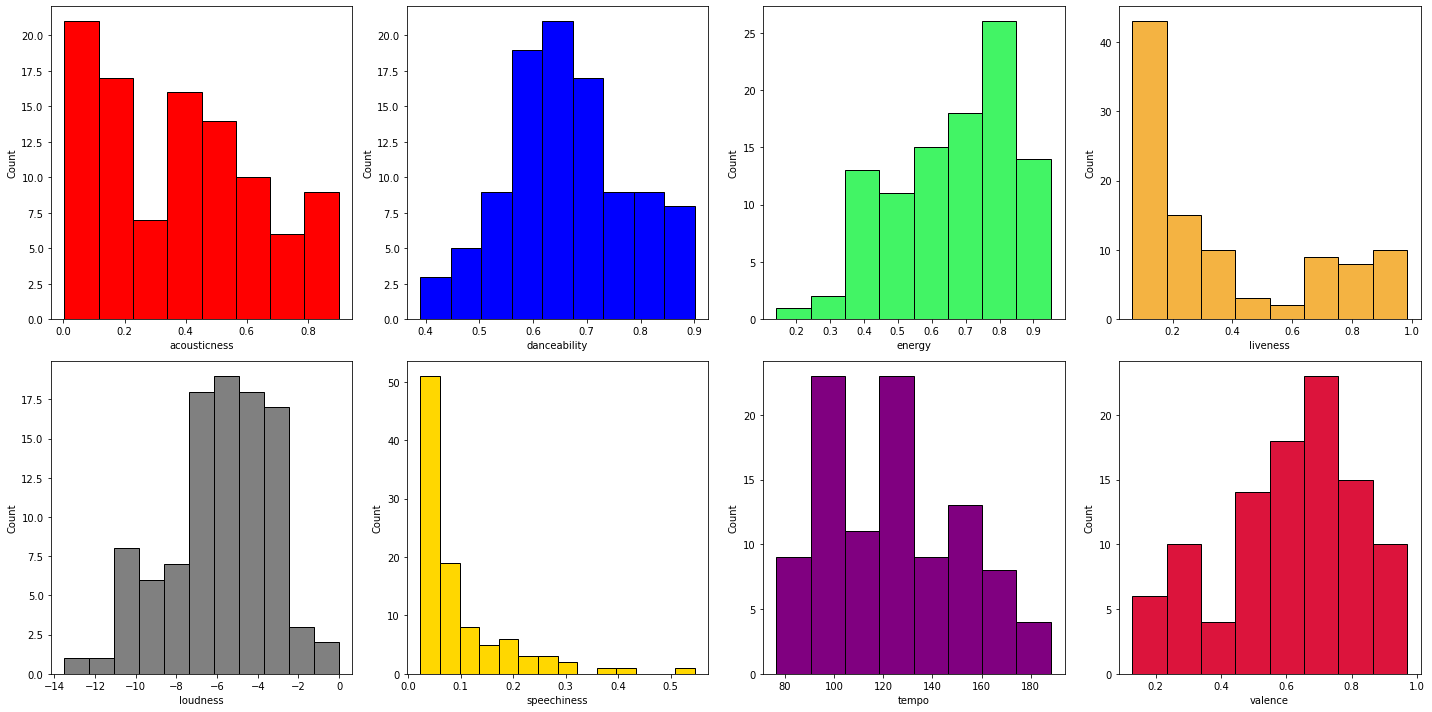

In [ ]:
# Avaliar as características das Top 100 de aparições
fig, ax =plt.subplots(2,4, figsize=(20, 10))
x1=np.array([0.2,0.4,0.6,0.8,1])
sns.histplot(MusicasTop100Completo["acousticness"], ax=ax[0,0],facecolor='red' )
sns.histplot(MusicasTop100Completo["danceability"], ax=ax[0,1],facecolor='blue')
sns.histplot(MusicasTop100Completo["energy"], ax=ax[0,2],facecolor= '#42f465')
sns.histplot(MusicasTop100Completo["liveness"], ax=ax[0,3] ,facecolor='#f4b342')

sns.histplot(MusicasTop100Completo["loudness"], ax=ax[1,0],facecolor='gray'  )
sns.histplot(MusicasTop100Completo["speechiness"], ax=ax[1,1],facecolor='gold')
sns.histplot(MusicasTop100Completo["tempo"], ax=ax[1,2],facecolor='purple')
sns.histplot(MusicasTop100Completo["valence"], ax=ax[1,3],facecolor='crimson')

fig.tight_layout()
fig.show()

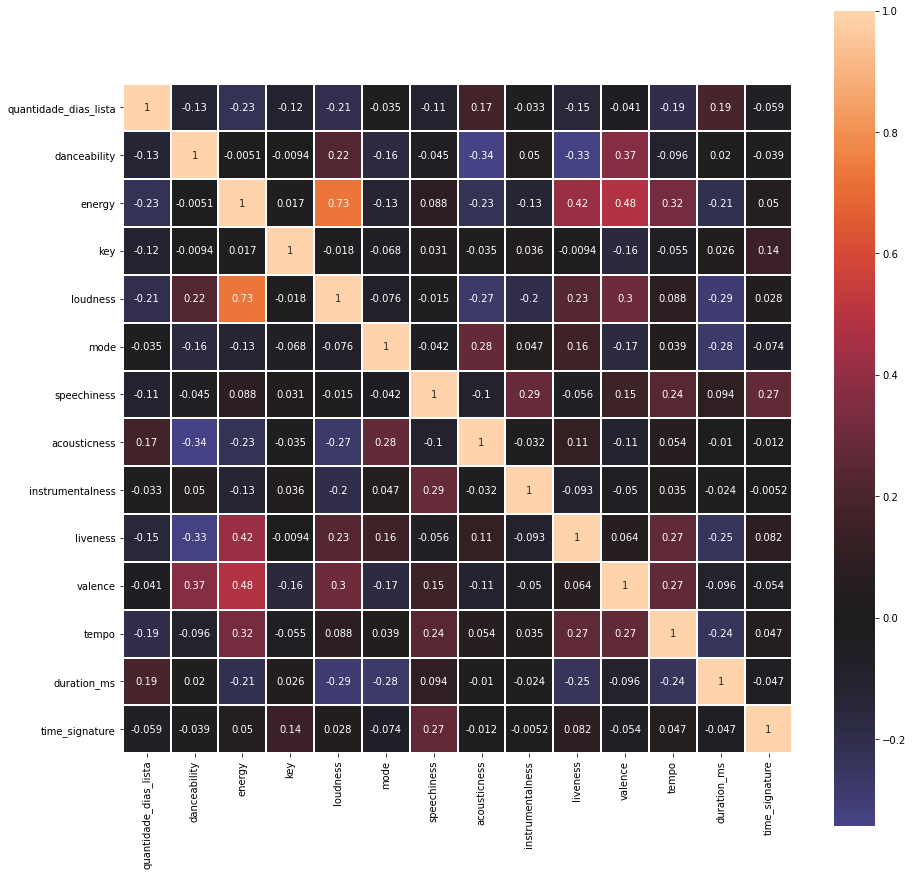

In [ ]:
# Correlacionar as características das 100 mais tocadas
Corr = MusicasTop100Completo.corr()
# Gerar visão de correlação
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.heatmap(Corr,  center=0,square=True, linewidths=1,annot=True, )
plt.show()

In [ ]:
'''
conta_aparicoes.describe(percentiles=[.10,.15,.25, .5, .75, .9, .95, .98, .99, .999])

print("- Média:",  conta_aparicoes['quantidade_dias_lista'].mean()
," \n- Moda:", conta_aparicoes['quantidade_dias_lista'].mode().values
,"\n- Mediana:", conta_aparicoes['quantidade_dias_lista'].median())

print('- Quantidade de musicas com uma aparição:', conta_aparicoes.query('quantidade_dias_lista == 1')['quantidade_dias_lista'].count()
, '\n- Quantidade de musicas com menos de 16 aparições:', conta_aparicoes.query('quantidade_dias_lista < 16')['quantidade_dias_lista'].count()
, '\n- Quantidade de musicas com 16 aparições:', conta_aparicoes.query('quantidade_dias_lista == 16')['quantidade_dias_lista'].count()
, '\n- Quantidade de musicas com mais de 16 aparições:', conta_aparicoes.query('quantidade_dias_lista > 16')['quantidade_dias_lista'].count()
, '\n- Quantidade de total de musicas no dataset:', conta_aparicoes['quantidade_dias_lista'].count())


#Mudando o rumo, vamos fazer uma analise exploratória nos dados
# Vamos ver quais são as 10 musicas que estiveram mais tempo no Top200
sns.barplot( data=SpotifyLista200, x='Track Name', y='count')

#Gerando visão grafica
sns.boxplot(data = conta_aparicoes)

# Carregando as caracteristicas das musicas na lista com a quantidade de dias no Top 200 
SpotifyLista200Completa = pd.merge(conta_aparicoes,SpotifyFeatures,left_on='track_id',right_on='id' )
SpotifyLista200Completa.head(1)

#Analisando a quantidade de aparições
conta_aparicoes.describe()


'''


'\nconta_aparicoes.describe(percentiles=[.10,.15,.25, .5, .75, .9, .95, .98, .99, .999])\n\nprint("- Média:",  conta_aparicoes[\'quantidade_dias_lista\'].mean()\n," \n- Moda:", conta_aparicoes[\'quantidade_dias_lista\'].mode().values\n,"\n- Mediana:", conta_aparicoes[\'quantidade_dias_lista\'].median())\n\nprint(\'- Quantidade de musicas com uma aparição:\', conta_aparicoes.query(\'quantidade_dias_lista == 1\')[\'quantidade_dias_lista\'].count()\n, \'\n- Quantidade de musicas com menos de 16 aparições:\', conta_aparicoes.query(\'quantidade_dias_lista < 16\')[\'quantidade_dias_lista\'].count()\n, \'\n- Quantidade de musicas com 16 aparições:\', conta_aparicoes.query(\'quantidade_dias_lista == 16\')[\'quantidade_dias_lista\'].count()\n, \'\n- Quantidade de musicas com mais de 16 aparições:\', conta_aparicoes.query(\'quantidade_dias_lista > 16\')[\'quantidade_dias_lista\'].count()\n, \'\n- Quantidade de total de musicas no dataset:\', conta_aparicoes[\'quantidade_dias_lista\'].count())\n\